<a href="https://colab.research.google.com/github/Topofajar/TugasAkhir/blob/main/Script_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dasar PSO

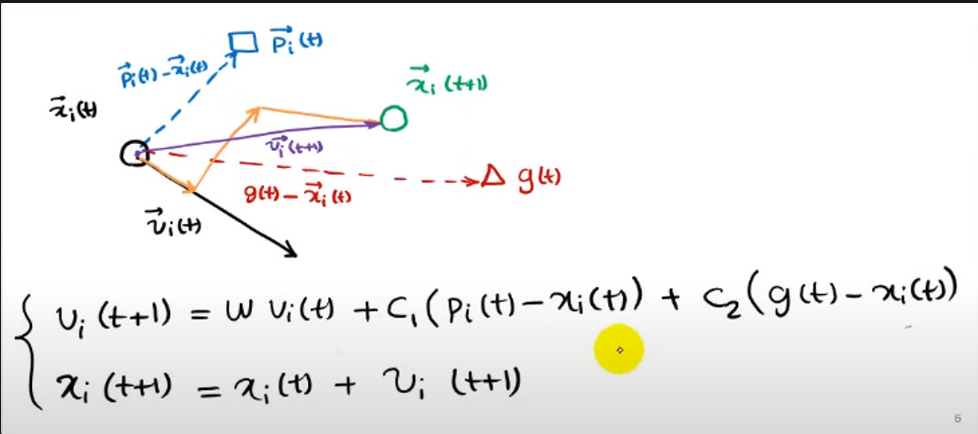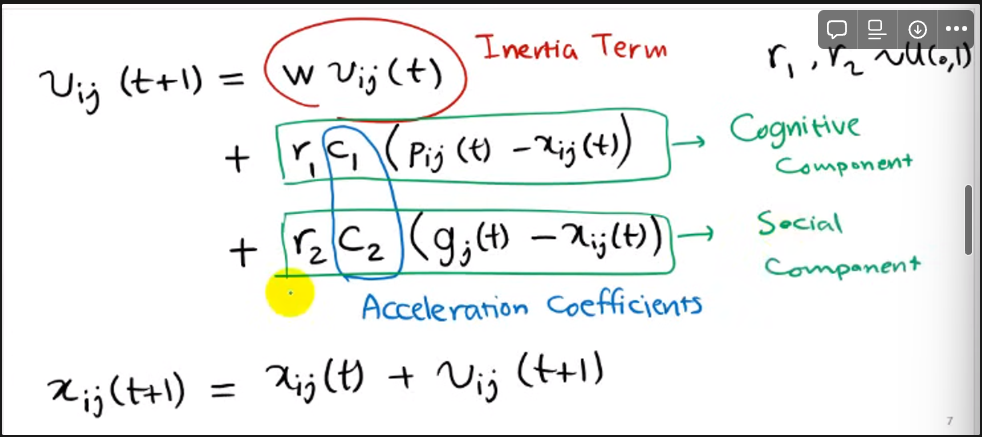

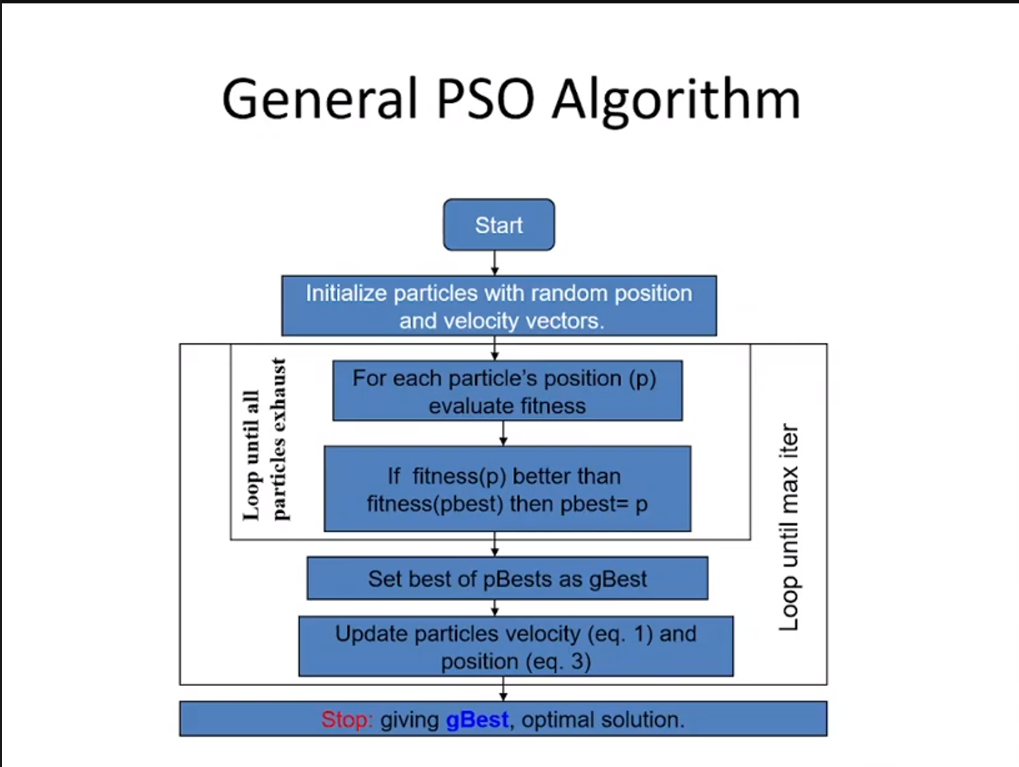

# Dasar Program

## Class


*   Dalam paradigma pemrograman berorientasi objek (OOP), kelas adalah struktur dasar yang digunakan untuk menciptakan objek.
*   Kelas mendefinisikan **atribut** (variabel) dan **metode** (fungsi) yang akan dimiliki oleh setiap objek yang dibuat berdasarkan kelas tersebut. Atribut merepresentasikan data yang terkait dengan objek, sedangkan metode adalah fungsi-fungsi yang dapat beroperasi pada objek tersebut.
*   Sebagai contoh, jika kita ingin membuat program untuk mengelola data mahasiswa, kita dapat membuat kelas bernama Mahasiswa yang memiliki atribut seperti nama, usia, dan jurusan, serta metode untuk mengubah atau memperoleh informasi tentang mahasiswa tersebut.



In [13]:
class Calculator:
    def __init__(self):
        self.result = 0  # Menyimpan hasil perhitungan

    def add(self, x, y):
        self.result = x + y

    def subtract(self, x, y):
        self.result = x - y

    def multiply(self, x, y):
        self.result = x * y

    def divide(self, x, y):
        if y != 0:
            self.result = x / y
        else:
            print("Error: Division by zero")

# Contoh penggunaan
if __name__ == "__main__":
    calculator = Calculator()  # Membuat objek Calculator

    calculator.add(5, 3)  # Menambahkan 5 dan 3
    print("Hasil penjumlahan:", calculator.result)

    calculator.subtract(10, 4)  # Mengurangkan 4 dari 10
    print("Hasil pengurangan:", calculator.result)

    calculator.multiply(2, 6)  # Mengalikan 2 dengan 6
    print("Hasil perkalian:", calculator.result)

    calculator.divide(8, 2)  # Membagi 8 dengan 2
    print("Hasil pembagian:", calculator.result)

    calculator.divide(5, 0)  # Mencoba pembagian dengan nol


Hasil penjumlahan: 8
Hasil pengurangan: 6
Hasil perkalian: 12
Hasil pembagian: 4.0
Error: Division by zero


* `def __init__(self):` akan dipanggil ketika objek dari kelas `Calculator ` dibuat, atribut `result` diinisialisasi dengan nilai 0.
* `__init__` dalam sebuah kelas Python adalah metode khusus yang disebut konstruktor, berguna  jika Anda perlu melakukan inisialisasi awal pada objek, seperti mengatur nilai awal untuk atribut-atribut objek.
* Ketika mendefinisikan metode di dalam sebuah kelas harus selalu menyertakan parameter `self` sebagai parameter pertama dalam definisi metode.
* Kegunaan utama dari `self` adalah untuk membedakan antara atribut dan metode dari objek kelas tersebut dengan variabel lokal atau global yang mungkin memiliki nama yang sama di dalam lingkup yang lebih luas.
* `if __name__ == "__main__":`, memastikan bahwa potongan kode di dalam blok tersebut hanya dijalankan jika skrip dieksekusi langsung sebagai program utama dan tidak dijalankan saat skrip diimpor sebagai modul ke dalam skrip lain.

In [14]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        print("My name is", self.name, "and I am", self.age, "years old.")

# Membuat objek dari kelas Person
person1 = Person("John", 30)

# Memanggil metode introduce() dari objek person1
person1.introduce()


My name is John and I am 30 years old.


# PSO Sumber Youtube

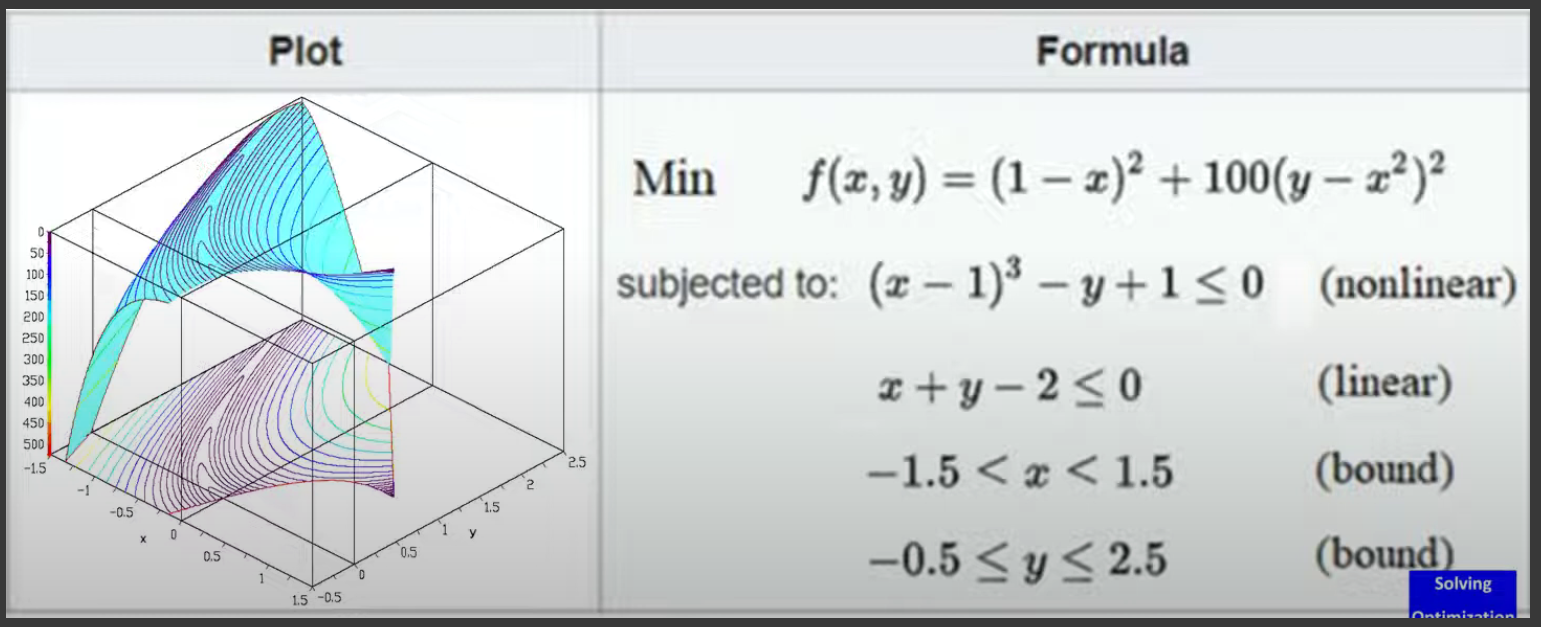

In [3]:
import random
import time
import matplotlib.pyplot as plt

In [4]:
# Objective function, constrain, boundary
def objective_function(O):
    x = O[0]
    y = O[1]
    nonlinear_constraint = (x - 1) ** 3 - y + 1
    linear_constraint = x + y - 2
    if nonlinear_constraint > 0:
        penalty1 = 1
    else:
        penalty1 = 0

    if linear_constraint > 0:
        penalty2 = 1
    else:
        penalty2 = 0

    z = (1 - x) ** 2 + 100 * (y - x ** 2) ** 2 + penalty1 + penalty2
    return z

bounds = [(-1.5, 1.5), (-0.5, 2.5)]  # upper and lower bounds of variables
nv = 2  # number of variables
mm = -1  # if minimization problem, mm = -1; if maximization problem, mm = 1

In [5]:
# PARAMETERS OF PSO
particle_size = 120  # number of particles
iterations = 200  # max number of iterations
w = 0.8  # inertia constant
c1 = 1  # cognative constant
c2 = 2  # social constant

In [6]:
class Particle:
    def __init__(self, bounds):
        self.particle_position = []  # particle position
        self.particle_velocity = []  # particle velocity
        self.local_best_particle_position = []  # best position of the particle
        self.fitness_local_best_particle_position = initial_fitness # Initial objective function value of the best particle
        self.fitness_particle_position = initial_fitness # onjective function value of the particle position

        for i in range(nv):
          self.particle_position.append(
              random.uniform(bounds[i][0], bounds[i][1])) # generate random initial position
          self.particle_velocity.append(random.uniform(-1, 1)) # generate random initial velocity

    def evaluate(self, objective_function):
        self.fitness_particle_position = objective_function(self.particle_position)
        if mm == -1:
            if self.fitness_particle_position < self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

        if mm == 1:
            if self.fitness_particle_position > self.fitness_local_best_particle_position:
                self.local_best_particle_position = self.particle_position  # update the local best
                self.fitness_local_best_particle_position = self.fitness_particle_position  # update the fitness of the local best

    def update_velocity(self, global_best_particle_position):
        for i in range(nv):
            r1 = random.random()
            r2 = random.random()

            cognitive_velocity = c1 * r1 * (self.local_best_particle_position[i] - self.particle_position[i])
            social_velocity = c2 * r2 * (global_best_particle_position[i] - self.particle_position[i])
            self.particle_velocity[i] = w * self.particle_velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(nv):
            self.particle_position[i] = self.particle_position[i] + self.particle_velocity[i]

            # check and repair to satisfy the upper bounds
            if self.particle_position[i] > bounds[i][1]:
                self.particle_position[i] = bounds[i][1]
            # check and repair to satisfy the lower bounds
            if self.particle_position[i] < bounds[i][0]:
                self.particle_position[i] = bounds[i][0]

In [7]:
class PSO:
    def __init__(self, objective_function, bounds, particle_size, iterations):
        fitness_global_best_particle_position = initial_fitness
        global_best_particle_position = []
        swarm_particle = []
        for i in range(particle_size):
            swarm_particle.append(Particle(bounds))
        A = []
        # Visualization
        fig = plt.figure()
        ax = fig.add_subplot()
        fig.show()
        plt.title('Evolutionary process of the objective function value')
        plt.xlabel("Iteration")
        plt.ylabel("Objective function")

        for i in range(iterations):
            for j in range(particle_size):
                swarm_particle[j].evaluate(objective_function)

                if mm == -1:
                    if swarm_particle[j].fitness_particle_position < fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

                if mm == 1:
                    if swarm_particle[j].fitness_particle_position > fitness_global_best_particle_position:
                        global_best_particle_position = list(swarm_particle[j].particle_position)
                        fitness_global_best_particle_position = float(swarm_particle[j].fitness_particle_position)

            for j in range(particle_size):
                swarm_particle[j].update_velocity(global_best_particle_position)
                swarm_particle[j].update_position(bounds)

            A.append(fitness_global_best_particle_position)   # record the best fitness
            #visualization
            ax.plot(A, color='r')
            fig.canvas.draw()
            ax.set_xlim(left=max(0, i - iterations), right = i + 3)
            time.sleep(0.001)

        print('Result:')
        print('Optimal solution:', global_best_particle_position)
        print('Objective function value:', fitness_global_best_particle_position)


Result:
Optimal solution: [0.0011256824091262212, 0.0033739084842564202]
Objective function value: 0.9988873732922442


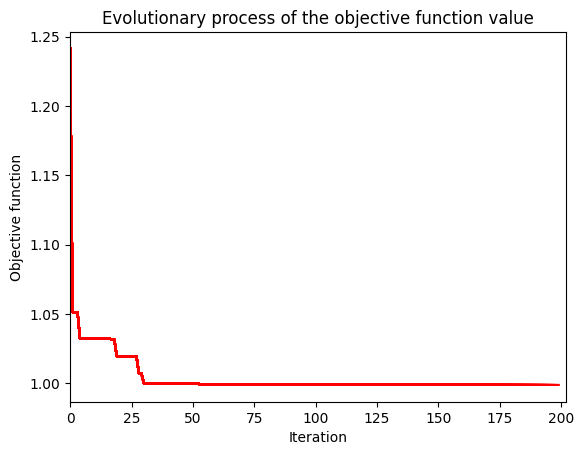

In [8]:
if mm == -1:
    initial_fitness = float("inf")
if mm == 1:
    initial_fitness = -float("inf")

# Main PSO
PSO(objective_function, bounds, particle_size, iterations)
plt.show()

# PSO Sumber Sad

### Objective Function

The objective function designed to be minimized is:

$$
f(x, y) = (x - 5)^2 + (y + 2)^2 + 10 \cdot \sin(x) \cdot \cos(y)
$$

### Constraints

The constraints for this optimization problem are:

1. **Circular Boundary Constraint**:
   $$
   x^2 + y^2 \leq 25
   $$
   This constraint ensures that the solution lies within a circle of radius 5 centered at the origin (0,0) on the \(xy\)-plane.

2. **Linear Inequality Constraint**:
   $$
   x - y \geq 0
   $$
   This implies that \(x\) must be greater than or equal to \(y\).

3. **Lower Bound Constraints**:
   $$
   x \geq 1 \quad \text{and} \quad y \geq -5
   $$
   These constraints set minimum values for \(x\) and \(y\) respectively, where \(x\) must be at least 1, and \(y\) must be no less than -5.


In [9]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = (x - 5)**2 + (y + 2)**2 + 10 * np.sin(x) * np.cos(y)

        # Constraint penalties
        if x**2 + y**2 > 25:
            fitness += 1000 * (x**2 + y**2 - 25)
        if x - y < 0:
            fitness += 1000 * (-(x - y))
        if x < 1:
            fitness += 1000 * (1 - x)
        if y < -5:
            fitness += 1000 * (-5 - y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[1, -5], [10, 5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 10

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {best_fitness}")


Epoch 1: Global Best Fitness = -4.891754062706925
Epoch 2: Global Best Fitness = -6.243090110875683
Epoch 3: Global Best Fitness = -6.556481435954904
Epoch 4: Global Best Fitness = -6.560715526661086
Epoch 5: Global Best Fitness = -6.560715526661086
Epoch 6: Global Best Fitness = -6.573411994956057
Epoch 7: Global Best Fitness = -6.591787843908203
Epoch 8: Global Best Fitness = -6.598977346206823
Epoch 9: Global Best Fitness = -6.602234572969461
Epoch 10: Global Best Fitness = -6.602756223391495
Final Best Position: [ 4.75747566 -0.35081934], Final Best Fitness: -6.602756223391495


Note kode
* `agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])`  # Enforce boundaries : digunakan untuk memaksa `position` berada pada interval batas. Jika kurang akan diganti dengan batas bawah, jika lebih diganti batas atas

In [17]:
a = np.clip (1,2,3)
a

2

###Schedulling problem

In [10]:
import numpy as np

class Job:
    def __init__(self, duration):
        self.duration = duration

class Agent:
    def __init__(self, sequence):
        self.sequence = sequence
        self.best_sequence = sequence.copy()
        self.best_fitness = float('inf')

    def evaluate_fitness(self, jobs):
        time = 0
        total_completion_time = 0
        for idx in self.sequence:
            job = jobs[idx]
            time += job.duration
            total_completion_time += time
        return total_completion_time

    def update_personal_best(self, jobs):
        fitness = self.evaluate_fitness(jobs)
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_sequence = self.sequence.copy()

class PSO:
    def __init__(self, jobs, pop_size, epochs):
        self.jobs = jobs
        self.pop_size = pop_size
        self.epochs = epochs
        self.population = [self.create_agent() for _ in range(pop_size)]
        self.global_best_sequence = None
        self.global_best_fitness = float('inf')

    def create_agent(self):
        sequence = np.random.permutation(len(self.jobs)).tolist()
        return Agent(sequence)

    def update_velocity_and_position(self):
        # Using a simple swap-based velocity metaphor
        for agent in self.population:
            new_sequence = agent.sequence.copy()
            i, j = np.random.randint(len(self.jobs), size=2)
            new_sequence[i], new_sequence[j] = new_sequence[j], new_sequence[i]
            agent.sequence = new_sequence

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                agent.update_personal_best(self.jobs)
                if agent.best_fitness < self.global_best_fitness:
                    self.global_best_fitness = agent.best_fitness
                    self.global_best_sequence = agent.best_sequence.copy()

            self.update_velocity_and_position()

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_sequence, self.global_best_fitness

# Example setup
jobs = [Job(5), Job(3), Job(8), Job(2)]
pop_size = 10
epochs = 20

# Running PSO
pso = PSO(jobs, pop_size, epochs)
best_sequence, best_fitness = pso.run()
print(f"Optimal Job Sequence: {best_sequence}, Minimum Completion Time: {best_fitness}")


Epoch 1: Global Best Fitness = 35
Epoch 2: Global Best Fitness = 35
Epoch 3: Global Best Fitness = 35
Epoch 4: Global Best Fitness = 35
Epoch 5: Global Best Fitness = 35
Epoch 6: Global Best Fitness = 35
Epoch 7: Global Best Fitness = 35
Epoch 8: Global Best Fitness = 35
Epoch 9: Global Best Fitness = 35
Epoch 10: Global Best Fitness = 35
Epoch 11: Global Best Fitness = 35
Epoch 12: Global Best Fitness = 35
Epoch 13: Global Best Fitness = 35
Epoch 14: Global Best Fitness = 35
Epoch 15: Global Best Fitness = 35
Epoch 16: Global Best Fitness = 35
Epoch 17: Global Best Fitness = 35
Epoch 18: Global Best Fitness = 35
Epoch 19: Global Best Fitness = 35
Epoch 20: Global Best Fitness = 35
Optimal Job Sequence: [3, 1, 0, 2], Minimum Completion Time: 35


In [12]:
jobs = [Job(5), Job(3), Job(8), Job(2)]
jobs

# Uji Coba Program Linear Sederhana

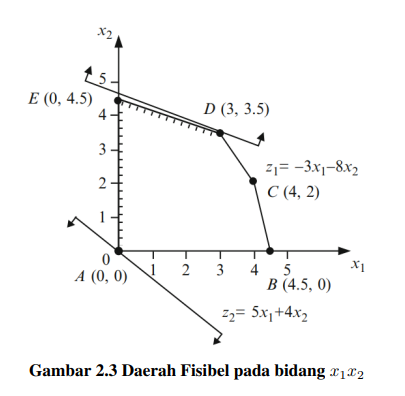

## Uji 1

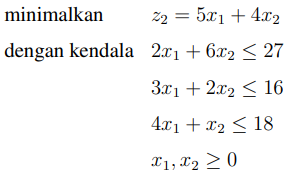

Penyelesaian optimal : (0, 0), nilai optimal : 0

In [20]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = 5*x + 4*y

        # Constraint penalties
        if 2*x + 6*y > 27:
            fitness += 1000 * ((2*x + 6*y) - 27)
        if 3*x + 2*y > 16:
            fitness += 1000 * ((3*x + 2*y) - 16)
        if 4*x + y > 18:
            fitness += 1000 * ((4*x + y) - 18)
        if x < 0:
            fitness += 1000 * (-x)
        if y < 0:
            fitness += 1000 * (-y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[0,0], [4.5, 4.5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 10

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {best_fitness}")


Epoch 1: Global Best Fitness = 3.08061594996156
Epoch 2: Global Best Fitness = 0.0
Epoch 3: Global Best Fitness = 0.0
Epoch 4: Global Best Fitness = 0.0
Epoch 5: Global Best Fitness = 0.0
Epoch 6: Global Best Fitness = 0.0
Epoch 7: Global Best Fitness = 0.0
Epoch 8: Global Best Fitness = 0.0
Epoch 9: Global Best Fitness = 0.0
Epoch 10: Global Best Fitness = 0.0
Final Best Position: [0. 0.], Final Best Fitness: 0.0


## Uji 2

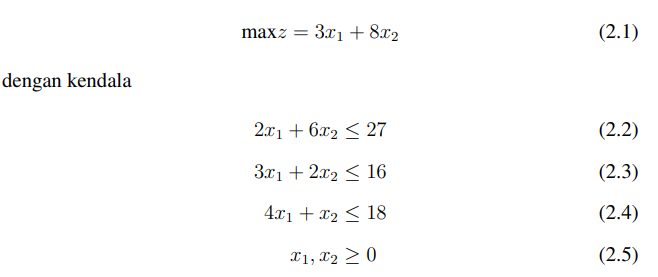

Penyelesaian optimal : (3, 3.5), nilai optimal : 37

In [40]:
import numpy as np

class Agent:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = np.copy(position)
        self.best_fitness = float('inf')

    def update_personal_best(self, fitness):
        if fitness < self.best_fitness:
            self.best_fitness = fitness
            self.best_position = np.copy(self.position)

class PSO:
    def __init__(self, pop_size, dimensions, bounds, epochs):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.bounds = bounds
        self.epochs = epochs
        self.w = 0.6  # inertia weight
        self.c1 = 1.2  # cognitive coefficient
        self.c2 = 1.2  # social coefficient
        self.global_best_position = np.zeros(dimensions)
        self.global_best_fitness = float('inf')
        self.population = [self.create_agent() for _ in range(pop_size)]

    def create_agent(self):
        position = np.random.uniform(self.bounds[0], self.bounds[1], self.dimensions)
        velocity = np.random.uniform(-1, 1, self.dimensions)
        return Agent(position, velocity)

    def evaluate(self, agent):
        x, y = agent.position
        fitness = -3*x - 8*y

        # Constraint penalties
        if 2*x + 6*y > 27:
            fitness += 1000 * ((2*x + 6*y) - 27)
        if 3*x + 2*y > 16:
            fitness += 1000 * ((3*x + 2*y) - 16)
        if 4*x + y > 18:
            fitness += 1000 * ((4*x + y) - 18)
        if x < 0:
            fitness += 1000 * (-x)
        if y < 0:
            fitness += 1000 * (-y)

        return fitness

    def update_velocity_and_position(self, agent):
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_velocity = self.c1 * r1 * (agent.best_position - agent.position)
        social_velocity = self.c2 * r2 * (self.global_best_position - agent.position)
        agent.velocity = self.w * agent.velocity + cognitive_velocity + social_velocity
        agent.position += agent.velocity
        agent.position = np.clip(agent.position, self.bounds[0], self.bounds[1])  # Enforce boundaries

    def run(self):
        for epoch in range(self.epochs):
            for agent in self.population:
                fitness = self.evaluate(agent)
                agent.update_personal_best(fitness)
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = np.copy(agent.position)

            for agent in self.population:
                self.update_velocity_and_position(agent)

            print(f'Epoch {epoch+1}: Global Best Fitness = {self.global_best_fitness}')

        return self.global_best_position, self.global_best_fitness

# Parameters
pop_size = 50
dimensions = 2
bounds = np.array([[0,0], [4.5, 4.5]])  # [lower_bounds, upper_bounds] adjusted for x >= 1, y >= -5
epochs = 100

# Running PSO
pso = PSO(pop_size, dimensions, bounds, epochs)
best_position, best_fitness = pso.run()
print(f"Final Best Position: {best_position}, Final Best Fitness: {-best_fitness}")


Epoch 1: Global Best Fitness = -34.841281839227825
Epoch 2: Global Best Fitness = -36.82666540332194
Epoch 3: Global Best Fitness = -36.82666540332194
Epoch 4: Global Best Fitness = -36.983711483512984
Epoch 5: Global Best Fitness = -36.983711483512984
Epoch 6: Global Best Fitness = -36.99067516444292
Epoch 7: Global Best Fitness = -36.99067516444292
Epoch 8: Global Best Fitness = -36.99067516444292
Epoch 9: Global Best Fitness = -36.99067516444292
Epoch 10: Global Best Fitness = -36.99067516444292
Epoch 11: Global Best Fitness = -36.99067516444292
Epoch 12: Global Best Fitness = -36.99067516444292
Epoch 13: Global Best Fitness = -36.99067516444292
Epoch 14: Global Best Fitness = -36.99067516444292
Epoch 15: Global Best Fitness = -36.99067516444292
Epoch 16: Global Best Fitness = -36.99395311735905
Epoch 17: Global Best Fitness = -36.99395311735905
Epoch 18: Global Best Fitness = -36.99395311735905
Epoch 19: Global Best Fitness = -36.99395311735905
Epoch 20: Global Best Fitness = -36.9